## COVID-19 Case Distribution in Connecticut by County

#### Goal: create a choropleth map using a shape file and a relevant dataset

- Data (Covid Testing): https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing-Archived/xdss-u53e/data_preview
- Shape File: https://gis.ny.gov/civil-boundaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [91]:
data = pd.read_csv('New_York_State_Statewide_COVID-19_Testing__Archived__20250407.csv')
data

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
...,...,...,...,...,...,...,...,...
93289,03/01/2020,Wayne,0,0,0,0,0.00%,COUNTY
93290,03/01/2020,Westchester,0,0,0,0,0.00%,COUNTY
93291,03/01/2020,Western New York,0,0,0,0,0.00%,REGION
93292,03/01/2020,Wyoming,0,0,0,0,0.00%,COUNTY


In [92]:
# Drop all non number columns
data_num = data.select_dtypes(include='number')

# Adding County back in as we are merging on this column later
data_num['County'] = data['County']

# Grouping by county and finding the mean 
dataByCounty = data_num.groupby(by = 'County').agg(np.nanmean)
dataByCounty

/var/folders/g_/21z44qpd6lb2yt8kgg3ns2mc0000gn/T/ipykernel_51546/1423974481.py:3: FutureWarning: The provided callable <function nanmean at 0x1042cb3a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dataByCounty = data_num.groupby(by = 'County').agg(np.nanmean)


,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
County,,,,
Albany,63.151800,42072.896714,1152.673709,8.818919e+05
Allegany,8.650235,5942.918623,202.187793,1.620300e+05
Bronx,407.258998,280226.826291,7475.071987,5.310883e+06
Broome,47.345853,31639.175274,976.608764,7.406488e+05
Capital Region,228.970266,148876.858372,4333.605634,3.269836e+06
...,...,...,...,...
Wayne,17.758216,11520.050078,325.353678,2.404010e+05
Westchester,268.666667,188728.266041,4908.225352,3.673572e+06
Western New York,310.642410,210791.917840,5045.048513,3.952246e+06


In [18]:
county = gpd.read_file('Counties.shx')
county

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,None,NaT,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"POLYGON ((605729.038 4737866.883, 606008.186 4..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,None,NaT,N,1035.209131,2019-04-26,210499.339692,2.681179e+09,"POLYGON ((229573.87 4712922.87, 229713.78 4712..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,None,NaT,Y,57.472148,2019-10-04,57253.861278,1.488522e+08,"POLYGON ((595540.679 4528518.902, 595766.658 4..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,None,NaT,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"POLYGON ((428899.262 4696276.376, 428927.641 4..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,None,NaT,N,1324.309219,2019-04-26,276084.505177,3.429945e+09,"POLYGON ((169747.34 4717358.9, 169915.5 471724..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,WASH,974155,36115,530000,East,59330,61042,63216,61302,None,NaT,N,845.855708,2017-11-10,302358.996670,2.190756e+09,"POLYGON ((630545.502 4850934.25, 630568.986 48..."
58,Wayne,WAYN,974156,36117,540000,Central,89123,93765,93772,91283,None,NaT,N,1395.598959,2018-02-08,254972.219986,3.614585e+09,"POLYGON ((359224.655 4839585.411, 360415.386 4..."
59,Westchester,WEST,974157,36119,550000,East,874866,923459,949113,1004457,None,NaT,N,499.972897,2019-10-04,182997.677827,1.294924e+09,"POLYGON ((621529.864 4575208.794, 621514.082 4..."
60,Wyoming,WYOM,974158,36121,560000,West,42507,43424,42155,40531,None,NaT,N,596.822633,2018-09-20,176096.925232,1.545764e+09,"POLYGON ((225124.646 4751746.514, 225132.043 4..."


In [93]:
# For ease of use, we change our shape file county name to match our data
county = county.rename(columns = {'NAME': 'County'})
map = county.merge(dataByCounty, on = 'County')

(np.float64(71853.38954500001),
 np.float64(813650.0947549996),
 np.float64(4455716.4048),
 np.float64(5010703.0898))

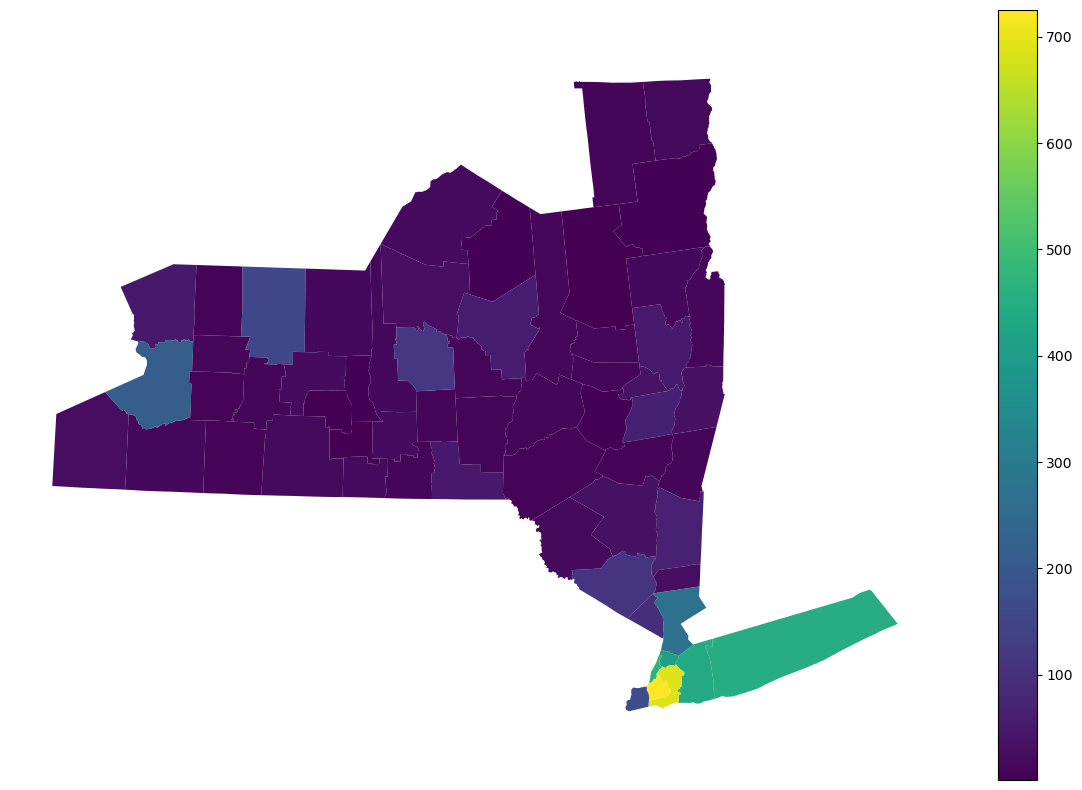

In [94]:
# Analyzing the number of new positive cases by county
fig, ax = plt.subplots(figsize = (15,10))
map.plot(column = 'New Positives', cmap = 'viridis' ,ax = ax, legend = True)
ax.axis('off')

Conclusion: Looking at the average number of new positive cases of COVID-19 by county, most of the state has lower than 200 new cases. It is expected to see the highest number of cases near New York City as it is the most densely populated.